<a href="https://colab.research.google.com/github/andreiacampos98/datascience_course/blob/main/data_science_fundamentals/aula7/4_Exercicios_aula7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

gerente_df=pd.read_excel("/content/Gerentes.xlsx")
vendas_df=pd.read_excel("/content/Vendas.xlsx")


1. Relacionar Vendas com Gerentes

Combine as informações das duas planilhas para identificar qual gerente está associado a cada venda. Quantas vendas cada gerente realizou no total?


In [4]:
vendas_gerentes=vendas_df.merge(gerente_df, on='ID Loja')
display(vendas_gerentes)

nb_vendas_gerente=vendas_gerentes.groupby(vendas_gerentes['Gerente']).size().sort_values()
display(nb_vendas_gerente)

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final,Gerente
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358,Salvador
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360,Salvador
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368,Salvador
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600,Joana
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71,Joana
...,...,...,...,...,...,...,...,...
93905,65012,2019-11-30,Shopping Vila Velha,Mochila Xadrez,2,283,566,Pablo
93906,65013,2019-11-30,Ribeirão Shopping,Pulseira Listrado,2,79,158,Fábio
93907,65013,2019-11-30,Ribeirão Shopping,Cueca Listrado,3,67,201,Fábio
93908,65014,2019-11-30,Shopping Morumbi,Pulseira Linho,5,114,570,Gisele


,0
Gerente,
João,3578
André,3605
Carol,3612
Gisele,3654
Paulo,3698
Letícia,3702
Nicole,3711
Lilia,3711
Andressa,3713


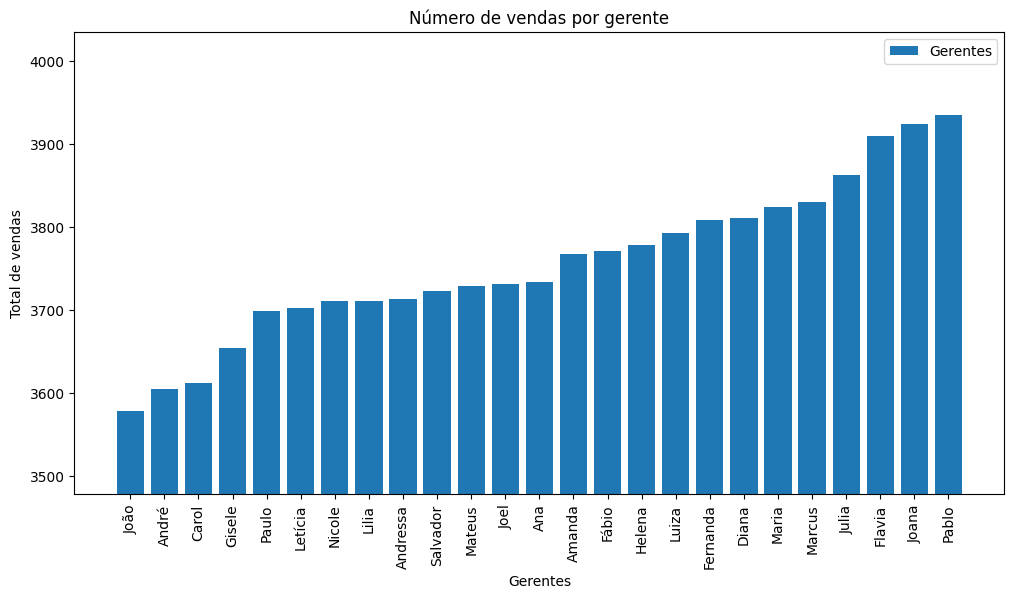

In [5]:
plt.figure(figsize = (12,6))
plt.bar(nb_vendas_gerente.index, nb_vendas_gerente.values, label="Gerentes")
plt.legend()
plt.title("Número de vendas por gerente")
plt.xlabel("Gerentes")
plt.ylabel("Total de vendas")
plt.ylim(nb_vendas_gerente.min() - 100 , nb_vendas_gerente.max() + 100)
plt.xticks(rotation=90)
plt.show()


2. Desempenho por Loja

Qual foi o total de vendas (em valor final) realizado por cada loja? Apresente as lojas em ordem decrescente de faturamento.


In [6]:
total_vendas_loja=vendas_gerentes.groupby(vendas_gerentes['ID Loja'])['Valor Final'].sum().sort_values(ascending=False)
display(total_vendas_loja)

,Valor Final
ID Loja,
Shopping Vila Velha,1615271
Iguatemi Campinas,1612460
Shopping SP Market,1610930
Norte Shopping,1610477
Palladium Shopping Curitiba,1600499
Bourbon Shopping SP,1600260
Shopping Center Leste Aricanduva,1596714
Iguatemi Esplanada,1596339
Ribeirão Shopping,1594186


In [17]:
import matplotlib.ticker as ticker
import plotly.express as px

fig = px.bar(total_vendas_loja, y='Valor Final', title='Valor de vendas por loja')
#fig.update_traces(texttemplate='R$ %{text:.2s}', textposition='outside')

fig.show()

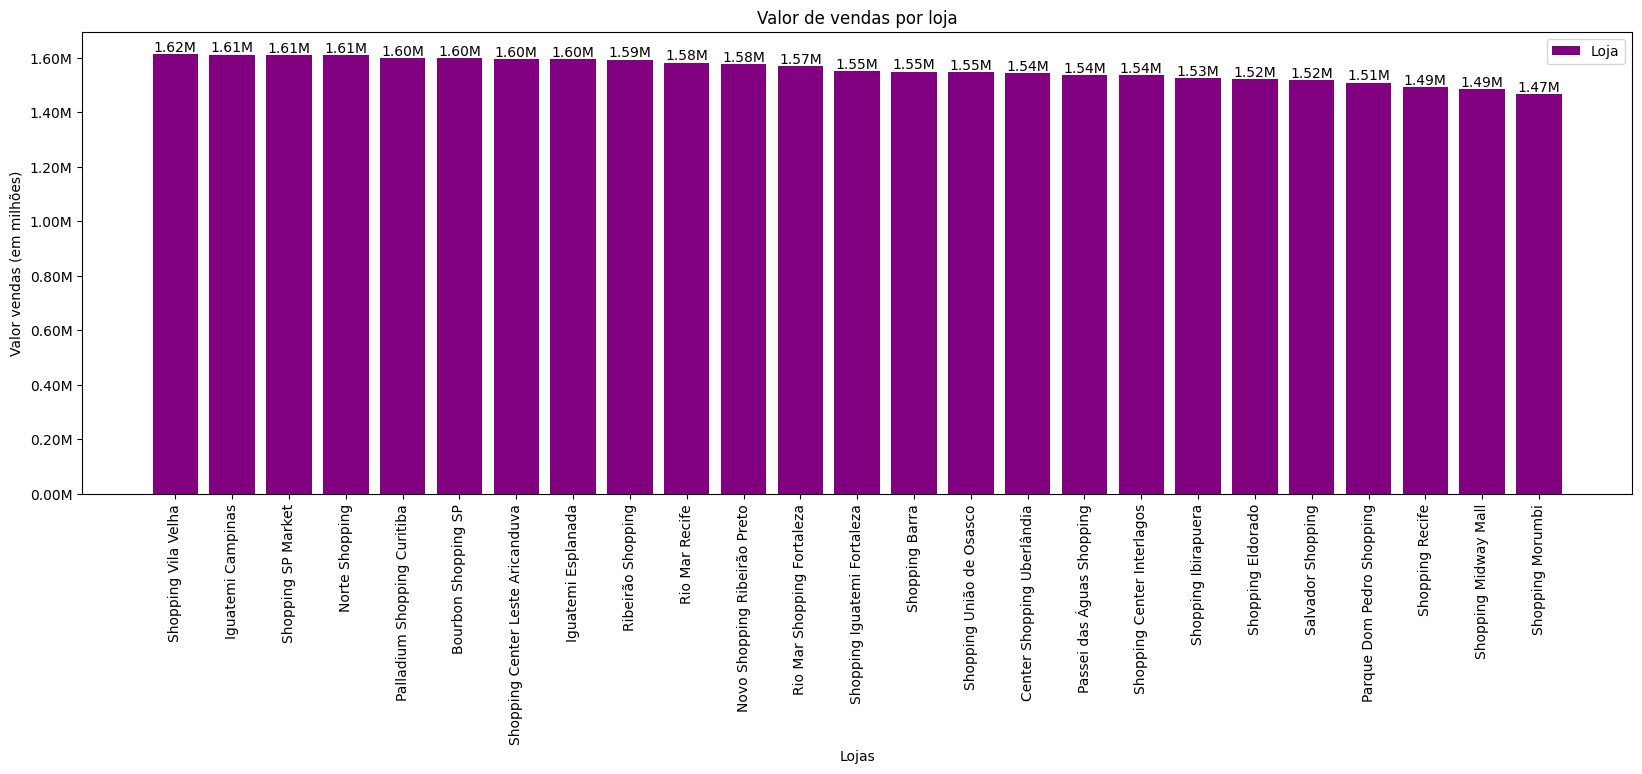

In [16]:
import matplotlib.ticker as ticker


# Criar o gráfico de barras
plt.figure(figsize=(20, 6))
bars=plt.bar(total_vendas_loja.index, total_vendas_loja.values, color='purple', label='Loja')

# Configurações do gráfico
plt.title("Valor de vendas por loja")
plt.legend()
plt.xlabel("Lojas")
plt.ylabel("Valor vendas (em milhões)")
plt.xticks(rotation=90)

# Formatar o eixo Y para mostrar valores em milhões
formatter = ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M')
plt.gca().yaxis.set_major_formatter(formatter)

for i, value in enumerate(total_vendas_loja.values):
    plt.text(i, value + 10000, f"{value/1e6:.2f}M", ha="center", fontsize=10, color="black")


# Exibir o gráfico
plt.show()

3. Produto Mais Vendido

Qual produto foi o mais vendido (em quantidade) em todo o período? Liste também o produto com o maior faturamento.


In [21]:
produtos_vendas=vendas_gerentes.groupby(vendas_gerentes['Produto']).size().sort_values(ascending=False)
produtos_valor_vendido=vendas_gerentes.groupby(vendas_gerentes['Produto'])['Valor Final'].sum().sort_values(ascending=False)
display(produtos_vendas)
display(produtos_valor_vendido)

,0
Produto,
Bermuda Linho,857
Mochila Liso,854
Pulseira Liso,851
Relógio Listrado,847
Cueca,840
...,...
Meia Xadrez,736
Gorro Estampa,732
Sunga Estampa,730


,Valor Final
Produto,
Terno Listrado,1215935
Terno Linho,1203000
Terno Liso,1199520
Terno Xadrez,1169850
Terno Estampa,1135954
...,...
Meia Estampa,88400
Meia Xadrez,64944
Meia Liso,62358


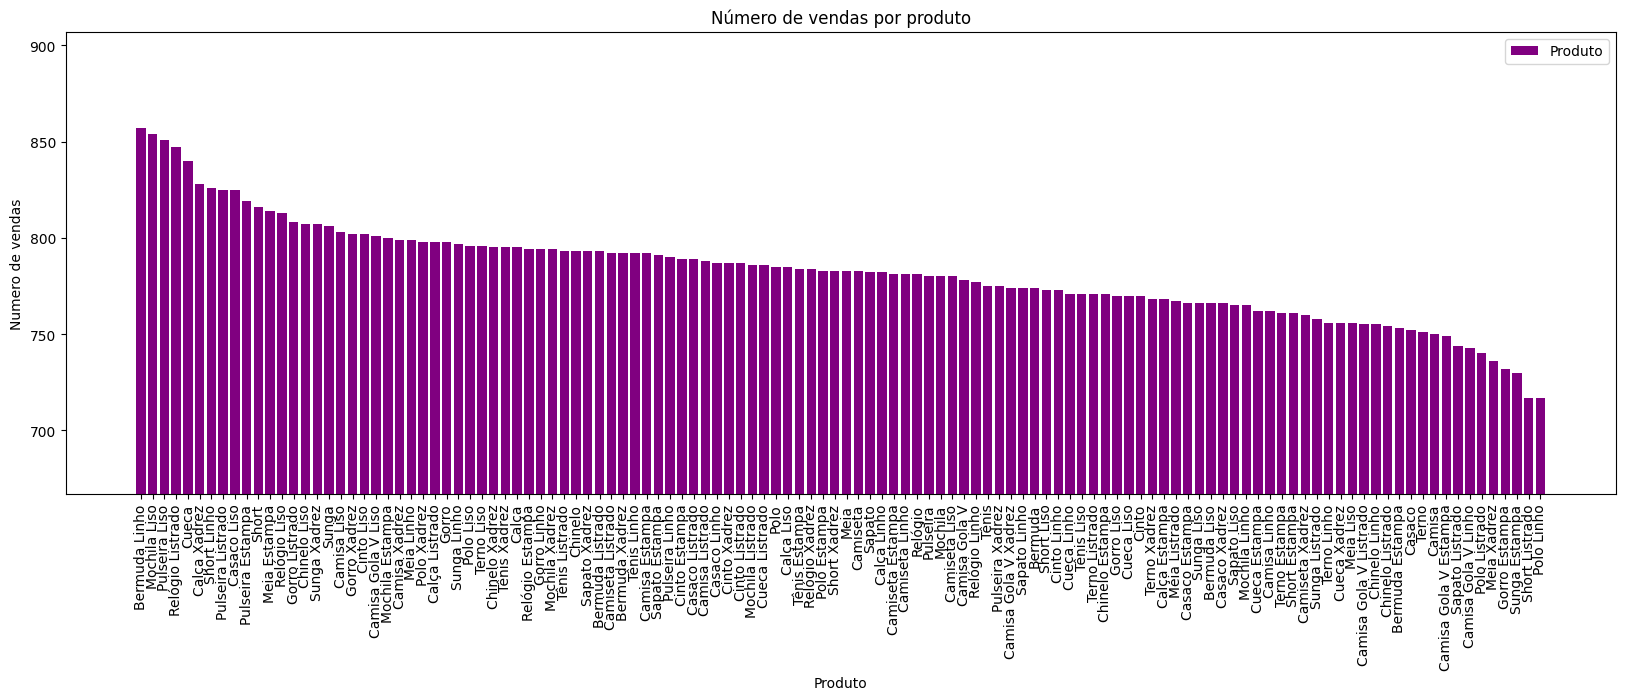

In [47]:
plt.figure(figsize=(20, 6))
bars=plt.bar(produtos_vendas.index, produtos_vendas.values, color='purple', label='Produto')

# Configurações do gráfico
plt.title("Número de vendas por produto")
plt.legend()
plt.xlabel("Produto")
plt.ylabel("Numero de vendas")
plt.xticks(rotation=90)
plt.ylim(produtos_vendas.min() -50, produtos_vendas.max() + 50)


# Exibir o gráfico
plt.show()

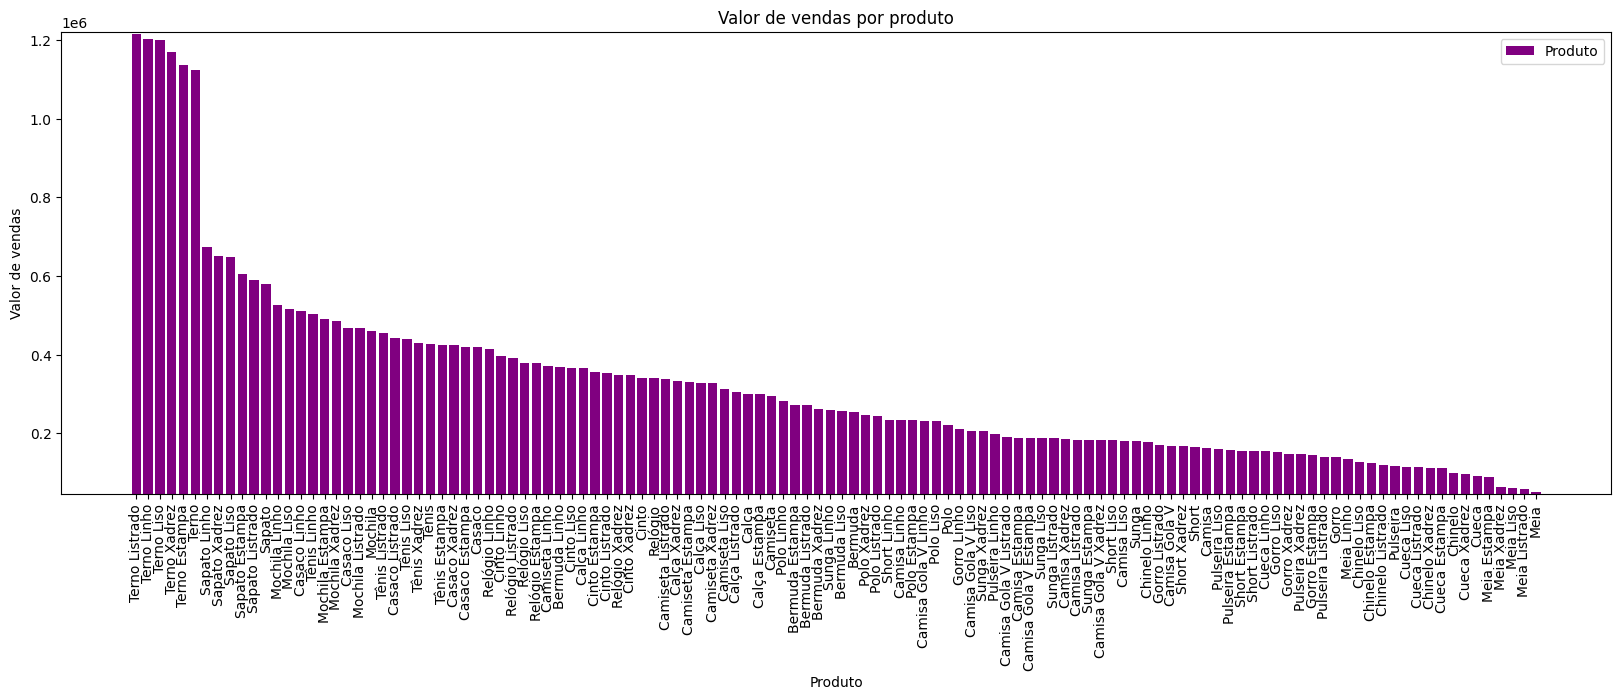

In [51]:
plt.figure(figsize=(20, 6))
bars=plt.bar(produtos_valor_vendido.index, produtos_valor_vendido.values, color='purple', label='Produto')

# Configurações do gráfico
plt.title("Valor de vendas por produto")
plt.legend()
plt.xlabel("Produto")
plt.ylabel("Valor de vendas")
plt.xticks(rotation=90)
plt.ylim(produtos_valor_vendido.min() -5000, produtos_valor_vendido.max() + 5000)


# Exibir o gráfico
plt.show()

4. Venda Média por Loja

Calcule a média do valor final das vendas para cada loja. Qual loja teve a maior média?


In [58]:
media_vendas=round(vendas_gerentes.groupby(vendas_gerentes['ID Loja'])['Valor Final'].mean().sort_values(ascending=False),2)
display(media_vendas)
print(f"A loja que teve a maior média foi {media_vendas.idxmax()}")

,Valor Final
ID Loja,
Iguatemi Esplanada,428.89
Iguatemi Campinas,425.11
Rio Mar Recife,424.03
Shopping SP Market,423.04
Ribeirão Shopping,422.75
Shopping Barra,418.68
Parque Dom Pedro Shopping,417.93
Bourbon Shopping SP,417.82
Shopping União de Osasco,417.07


A loja que teve a maior média foi Iguatemi Esplanada


5. Análise Temporal

Analise o desempenho de vendas ao longo do tempo (ex.: por mês ou trimestre). Algum padrão ou tendência sazonal foi identificado?


In [79]:
import calendar
vendas_gerentes['Mes'] = vendas_gerentes['Data'].dt.month
vendas_gerentes['Mes_nome'] = vendas_gerentes['Mes'].map(lambda x: calendar.month_name[x])

display(vendas_gerentes)

# Agrupar por nome do mês e calcular o total de vendas
vendas_mes = vendas_gerentes.groupby('Mes_nome').size()

# Ordenar os meses no formato correto
vendas_mes = vendas_mes.reindex(calendar.month_name[1:])  # Ignorar o índice vazio no início

print(vendas_mes)

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final,Gerente,Mes,Mes_nome
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358,Salvador,1,January
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360,Salvador,1,January
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368,Salvador,1,January
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600,Joana,1,January
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71,Joana,1,January
...,...,...,...,...,...,...,...,...,...,...
93905,65012,2019-11-30,Shopping Vila Velha,Mochila Xadrez,2,283,566,Pablo,11,November
93906,65013,2019-11-30,Ribeirão Shopping,Pulseira Listrado,2,79,158,Fábio,11,November
93907,65013,2019-11-30,Ribeirão Shopping,Cueca Listrado,3,67,201,Fábio,11,November
93908,65014,2019-11-30,Shopping Morumbi,Pulseira Linho,5,114,570,Gisele,11,November


Mes_nome
January      8463.0
February     7896.0
March        8743.0
April        8459.0
May          8742.0
June         8461.0
July         8741.0
August       8743.0
September    8460.0
October      8742.0
November     8460.0
December        NaN
dtype: float64


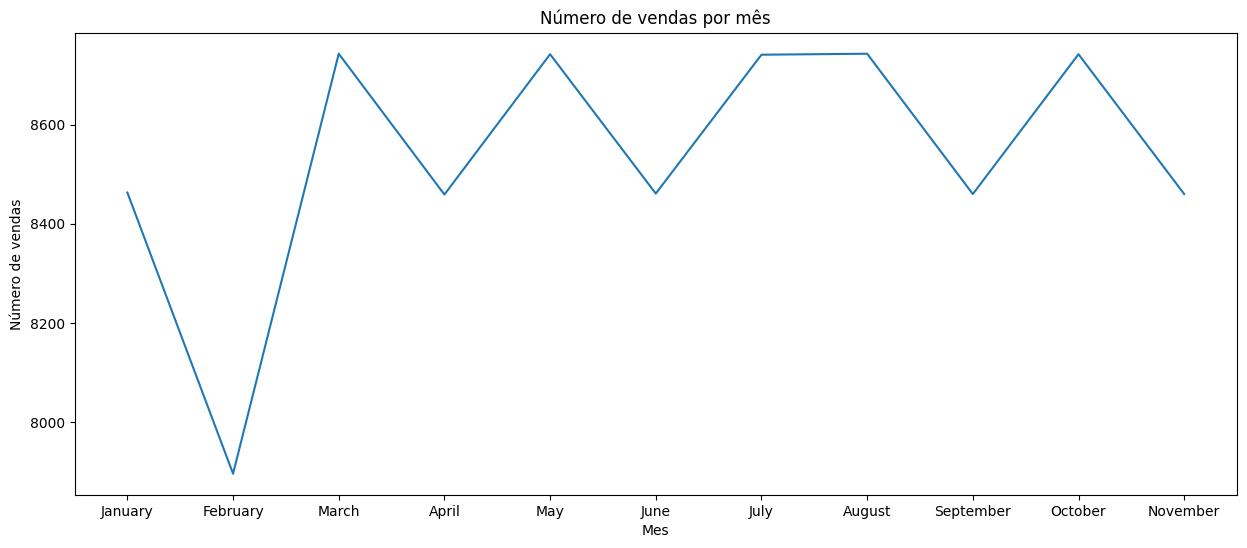

In [80]:
plt.figure(figsize=(15, 6))
plt.plot(vendas_mes.index, vendas_mes.values)
plt.xlabel('Mes')
plt.ylabel('Número de vendas')
plt.title('Número de vendas por mês')
plt.show()